In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = data.drop(['Food_InsecurityLevel'],axis=1)
X = scaler.fit_transform(X_new)
y = data['Food_InsecurityLevel']
y.unique()

array([3, 4, 2, 1], dtype=int32)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
train = pd.DataFrame(X_train)
train.columns = [X_new.columns.tolist()]
train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,0.5,0.1,0.1,0.5,0.1,0.1,0.030186,0.000000,0.201500,0.000000,0.414976,0.124194,0.000000,0.315470,0.275862,0.038284,0.053065,0.000000,0.026258,0.975833,0.024167,0.290353,0.750000,0.933013,0.75,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,0.9,0.6,0.0,0.8,0.4,0.0,0.524528,0.669662,0.841177,0.068280,0.277167,0.946402,0.094924,0.801561,0.830758,0.841754,0.172726,0.000000,0.286775,0.840310,0.159690,0.381176,0.933013,0.750000,0.00,0.500000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,0.5,0.0,0.5,0.3,0.0,0.1,0.806532,0.000000,0.970414,0.978906,0.439007,0.000000,0.000000,0.975989,0.000000,0.917356,0.594566,0.333333,0.019936,1.000000,0.000000,0.235294,0.750000,0.066987,0.25,0.066987,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,0.0,0.0,0.0,0.8,0.4,0.2,0.910266,0.000000,0.951948,0.797592,0.304014,0.804725,0.574143,0.920099,0.655134,0.872330,0.877238,0.333333,0.594628,0.673858,0.326142,0.558824,0.750000,0.933013,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,0.6,0.5,0.0,0.6,0.5,0.0,0.233292,0.000000,0.961022,0.008183,0.941499,0.957199,0.205578,0.110485,0.942762,0.534121,0.559146,0.000000,0.465996,0.956363,0.043637,0.364706,0.066987,0.250000,0.75,0.933013,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
..

In [5]:
test = pd.DataFrame(X_test)
test.columns = [X_new.columns.tolist()]
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [6]:
y_train

5623     3
32426    3
5934     4
16092    1
30533    1
        ..
20757    4
32103    1
30403    1
21243    4
2732     1
Name: Food_InsecurityLevel, Length: 26796, dtype: int32

In [7]:
from sklearn.model_selection import GridSearchCV

In [6]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100, 500, 1000]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search_et = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_et.fit(X_train, y_train)
grid_search_et.best_params_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
grid_search_et = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_et.fit(X_train, y_train)
grid_search_et.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 93.7min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [ ]:
parameters_mlp = {
    'hidden_layer_sizes': [(100,100),(100,100,100),(40,100),(1000,1000)],
    'alpha':[0.0001,0.001,0.00001],
    'max_iter':[500]
}
grid_search_mlp = GridSearchCV(estimator = MLPClassifier(), param_grid = parameters_mlp, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_mlp.fit(X_train, y_train)
grid_search_mlp.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 89.6min finished


{'alpha': 0.0001, 'hidden_layer_sizes': (40, 100), 'max_iter': 500}

In [7]:
parameters_svc = {
    'C':[10],
    'gamma':[0.1]
    'kernel':['rbf']
}

grid_search_svc = GridSearchCV(estimator = SVC(), param_grid = parameters_svc, 
                          cv = 3, n_jobs = -1, verbose = 10)

grid_search_svc.fit(X_train, y_train)
grid_search_svc.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [7]:
clf_svc = SVC(C=10, gamma=0.1, kernel='rbf')
clf_svc.fit(train, y_train)
clf_svc.score(test, y_test)

0.6592028660994178

In [8]:
!pip install shap
import shap

     |████████████████████████████████| 358kB 5.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=f28250d119d7ab82ccfe6305b83dc2b6b7b39b9b99e38def146a500e754c5472
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [9]:
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,0.80,0.20,0.50,0.7,0.2,0.50,0.044544,0.144115,0.370054,0.073368,0.803460,0.087785,0.846318,0.222328,0.106175,0.779635,0.762679,0.000000,0.854920,0.588115,0.411885,0.588235,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,0.40,0.20,0.11,0.4,0.2,0.14,0.044773,0.000000,0.082447,0.125363,0.000000,0.000000,0.000000,1.000000,0.000000,0.135727,0.003892,0.250000,0.019779,1.000000,0.000000,0.122941,0.933013,0.750000,0.75,0.933013,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,1.00,0.40,0.00,0.5,0.1,0.10,0.000589,0.000000,0.315694,0.000000,0.557204,0.267599,0.933538,0.057946,0.379387,0.394167,0.952225,0.250000,0.718332,0.000810,0.999190,0.470588,0.500000,1.000000,1.00,0.500000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,0.76,0.22,0.42,1.0,0.1,0.50,0.052069,0.168459,0.128978,0.116635,0.148656,0.000000,0.000000,0.616899,0.000000,0.274333,0.252682,0.000000,0.055550,0.500000,0.500000,0.340471,0.933013,0.750000,0.50,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,1.00,0.60,0.20,0.5,0.0,0.20,0.034657,0.000000,0.165033,0.000000,0.160794,0.242405,0.547750,0.420258,0.657412,0.272016,0.317500,0.000000,0.373875,0.500000,0.500000,0.117647,0.000000,0.500000,0.75,0.066987,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [10]:
tester = test.sample(n=50, random_state=1)
tester

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,score_HDDS_GoodSeason,score_HDDS_farmbasedGoodSeason,score_HDDS_purchasedGoodSeason,score_HDDS_BadSeason,score_HDDS_farmbasedBadSeason,score_HDDS_purchasedBadSeason,total_income_USD_PPP_pHH_Yr,offfarm_income_USD_PPP_pHH_Yr,value_farm_produce_USD_PPP_pHH_Yr,crop_sales_USD_PPP_pHH_Yr,value_crop_consumed_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,GHGEmissions,Gender_MaleControl,Gender_FemaleControl,NFertInput,sinBestFoodSecMonth,cosBestFoodSecMonth,sinWorstFoodSecMonth,cosWorstFoodSecMonth,Head_EducationLevel_<Other>,Head_EducationLevel_<illiterate>,Head_EducationLevel_<literate>,Head_EducationLevel_<no_school>,...,HouseholdType_<nonparenthead>,HouseholdType_<other>,HouseholdType_<polygamous>,HouseholdType_<single>,HouseholdType_<together>,HouseholdType_<woman_single>,HouseholdType_<workaway>,Country_<Bolivia>,Country_<Burkina_Faso>,Country_<Burundi>,Country_<Cambodia>,Country_<Comoros>,Country_<Costa_Rica>,Country_<Cote d'Ivoire>,Country_<DRC>,Country_<Ecuador>,Country_<El_Salvador>,Country_<Ethiopia>,Country_<Ghana>,Country_<Guatemala>,Country_<Honduras>,Country_<India>,Country_<Kenya>,Country_<LaoPDR>,Country_<Malawi>,Country_<Mali>,Country_<Morocco>,Country_<Nicaragua>,Country_<Niger>,Country_<Nigeria>,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
2856,0.0,0.600825,0.387605,0.264366,0.10,0.24000,0.116054,0.083333,0.200000,0.5090,0.00,0.00,0.00,0.90,0.30,0.20,0.640080,0.767621,0.569846,0.537668,0.614984,0.000000,0.000000,0.641285,0.000000,0.887157,0.572295,0.250000,0.026467,0.500000,0.500000,0.588235,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6015,0.0,0.614821,0.514837,0.394465,0.00,0.35000,0.811799,0.166667,0.200000,0.0890,0.70,0.30,0.30,0.50,0.30,0.10,0.373211,0.000000,0.976157,0.000000,0.930465,0.959402,0.020504,0.568614,0.594577,0.690090,0.744834,0.000000,0.847754,0.500000,0.500000,0.235294,0.933013,0.750000,0.250000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.416952,0.636131,0.365974,0.20,0.10000,0.299807,0.000000,0.200000,0.1727,0.50,0.00,0.20,0.50,0.00,0.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149227,0.000000,0.000000,0.000000,0.000000,0.550648,0.000000,0.000000,0.057647,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7176,0.0,0.489309,0.435089,0.224764,1.00,0.20000,0.328820,0.250000,1.000000,0.9790,0.20,0.00,0.20,0.00,0.00,0.00,0.000000,0.000000,0.515328,0.000000,0.881527,0.000000,0.000000,0.054697,0.000000,0.117543,0.285401,0.333333,0.145577,1.000000,0.000000,0.352941,0.933013,0.750000,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,0.0,0.629995,0.508787,0.393387,1.00,0.15000,0.713346,0.000000,0.200000,0.4100,0.40,0.30,0.10,0.40,0.30,0.10,0.467382,0.000000,0.952596,0.142499,0.842234,0.948998,0.068347,0.588825,0.604938,0.056328,0.070776,0.000000,0.594653,0.462643,0.537357,0.470588,0.933013,0.250000,0.750000,0.933013,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
shap.initjs()
rf_explainer = shap.KernelExplainer(clf_svc.predict, tester)
rf_shap_values = rf_explainer.shap_values(tester)

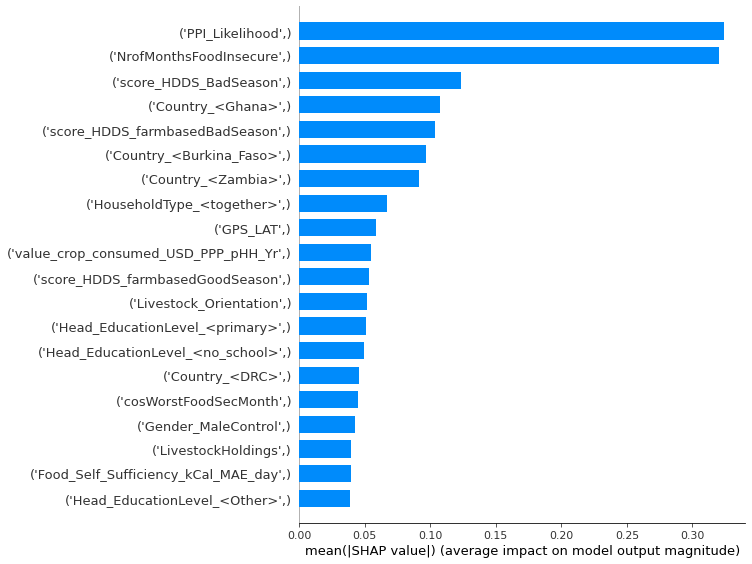

In [12]:
shap.summary_plot(rf_shap_values, tester, plot_type="bar")

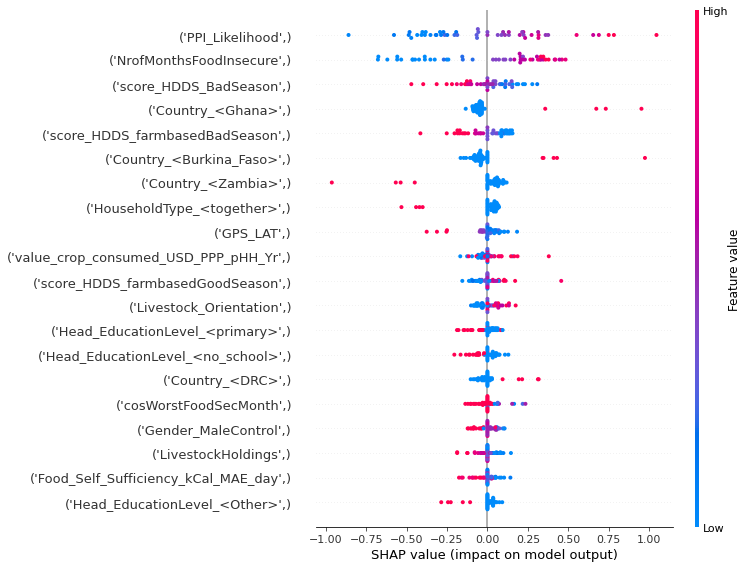

In [13]:
shap.summary_plot(rf_shap_values, tester)

In [19]:
#shap.summary_plot(rf_shap_values, tester, plot_type="bar").shapely_home_parallax p {
#    font-size: 28px;
#}

shap.plot.summary.wrap2(rf_shap_values, tester) +
        ggplot2::theme(axis.text.y = element_text(size = 20))

SyntaxError: ignored

In [14]:
tester.shape

(50, 89)

In [15]:
clf_svc.score(test, y_test)

0.6592028660994178